In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import BALROG_pipeline as bp
import skimage as ski
import torch
import os
import config
import pandas as pd

from rembg import new_session
session = new_session()

# Set the working directory
os.chdir("..")
from utils.config import ROOT
os.chdir(ROOT)

# Define the labels 
species_array = ['aegypti', 'albopictus', 'annulipes-group', 'caspius',
       'cataphylla', 'cinereus-geminus-pair', 'claviger-petragnani-pair',
       'communis-punctor-pair', 'japonicus', 'koreicus',
       'maculipennis s.l.', 'modestus', 'morsitans-fumipennis-pair',
       'other', 'pipiens s.l.-torrentium-pair', 'richiardii', 'rusticus',
       'stephensi', 'sticticus', 'vexans', 'vishnui-group']

/Users/kristophernolte/miniforge3/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/kristophernolte/miniforge3/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <FF5E77A4-1F04-398B-B781-976783A281B8> /Users/kristophernolte/miniforge3/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/Users/kristophernolte/miniforge3/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/kristophernolte/miniforge3/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/kristophernolte/miniforge3/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/kristophernolte/miniforge3/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wro

In [2]:
# Load the image
image_path = "utils/example_image_culex_pipiens.tif" # <--- change the path for the image of interest

In [3]:
# Load the models into dict
model_dict = {}
for file in os.listdir(os.path.join("classifier", "models")):
    if file.endswith(".pt"):
        FOLD = file.split("_")[1]
        model_dict[int(FOLD)] = torch.load(os.path.join("classifier", "models", file), map_location=torch.device('cpu'), weights_only=False)

# Process the image for prediction 
processed_iamge = bp.image_preprocessing_pipeline(image_path, session)

# Get prediction from all models
prediction_dict = {}
for FOLD in np.arange(1,6):
    prediction_dict[FOLD] = bp.get_model_prediction(model_dict[FOLD], processed_iamge)

prediction_df = pd.DataFrame.from_dict(prediction_dict, orient='index', columns=species_array)
prediction_df['predicted_species_score'] = prediction_df.max(axis=1)
prediction_df['predicted_species'] = prediction_df.idxmax(axis=1)

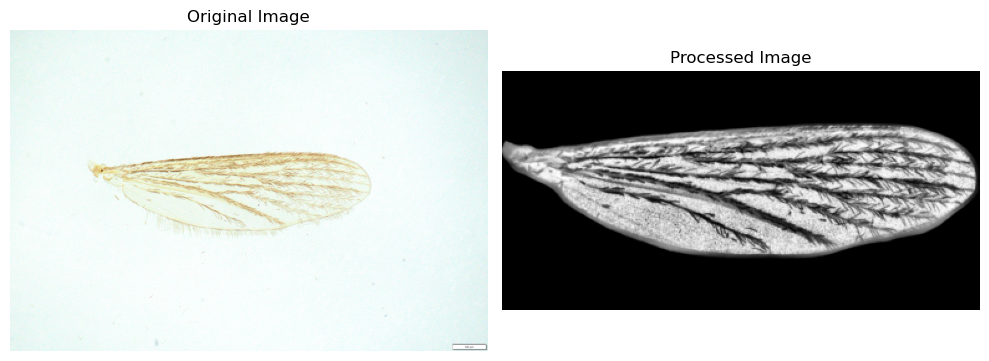

Model Fold 1:
    ➤ Predicted Species: pipiens s.l.-torrentium-pair
    ➤ Confidence Score: 5.287

Model Fold 2:
    ➤ Predicted Species: pipiens s.l.-torrentium-pair
    ➤ Confidence Score: 5.389

Model Fold 3:
    ➤ Predicted Species: pipiens s.l.-torrentium-pair
    ➤ Confidence Score: 5.624

Model Fold 4:
    ➤ Predicted Species: pipiens s.l.-torrentium-pair
    ➤ Confidence Score: 5.274

Model Fold 5:
    ➤ Predicted Species: pipiens s.l.-torrentium-pair
    ➤ Confidence Score: 5.261



In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ski.io.imread(image_path))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(processed_iamge[0], cmap='gray')
ax[1].set_title("Processed Image")
ax[1].axis('off')

plt.tight_layout()
plt.show()

for idx, row in prediction_df.iterrows():
    print(f"Model Fold {idx}:")
    print(f"    ➤ Predicted Species: \033[1m{row['predicted_species']}\033[0m")
    print(f"    ➤ Confidence Score: {row['predicted_species_score']:.3f}\n") # Everything over 4 is considered a good score